In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set style for better looking plots
sns.set_style('whitegrid')



In [11]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print("First 5 rows of the dataset:")
display(iris_df.head())

# Explore the structure of the dataset
print("\nDataset information:")
display(iris_df.info())

# Check for missing values
print("\nMissing values in each column:")
display(iris_df.isnull().sum())

# Clean the dataset (though there are no missing values in this dataset)
# For demonstration, here's how we would handle missing values:
iris_df_cleaned = iris_df.dropna()  # or .fillna() with appropriate values
print("\nDataset shape after cleaning (no changes as there were no missing values):", iris_df_cleaned.shape)

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Missing values in each column:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0



Dataset shape after cleaning (no changes as there were no missing values): (150, 5)


In [12]:
# Compute basic statistics
print("Basic statistics for numerical columns:")
display(iris_df.describe())

# Group by species and compute mean of numerical columns
print("\nMean values by species:")
display(iris_df.groupby('species').mean())

# Additional interesting analysis
print("\nMaximum sepal length by species:")
display(iris_df.groupby('species')['sepal length (cm)'].max())

print("\nCorrelation between petal length and petal width:")
display(iris_df[['petal length (cm)', 'petal width (cm)']].corr())

# Interesting finding
print("\nInteresting finding: Setosa has significantly smaller petals than other species")
display(iris_df.groupby('species')[['petal length (cm)', 'petal width (cm)']].mean())

Basic statistics for numerical columns:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Mean values by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026



Maximum sepal length by species:


,sepal length (cm)
species,
setosa,5.8
versicolor,7.0
virginica,7.9



Correlation between petal length and petal width:


,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000



Interesting finding: Setosa has significantly smaller petals than other species


,petal length (cm),petal width (cm)
species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


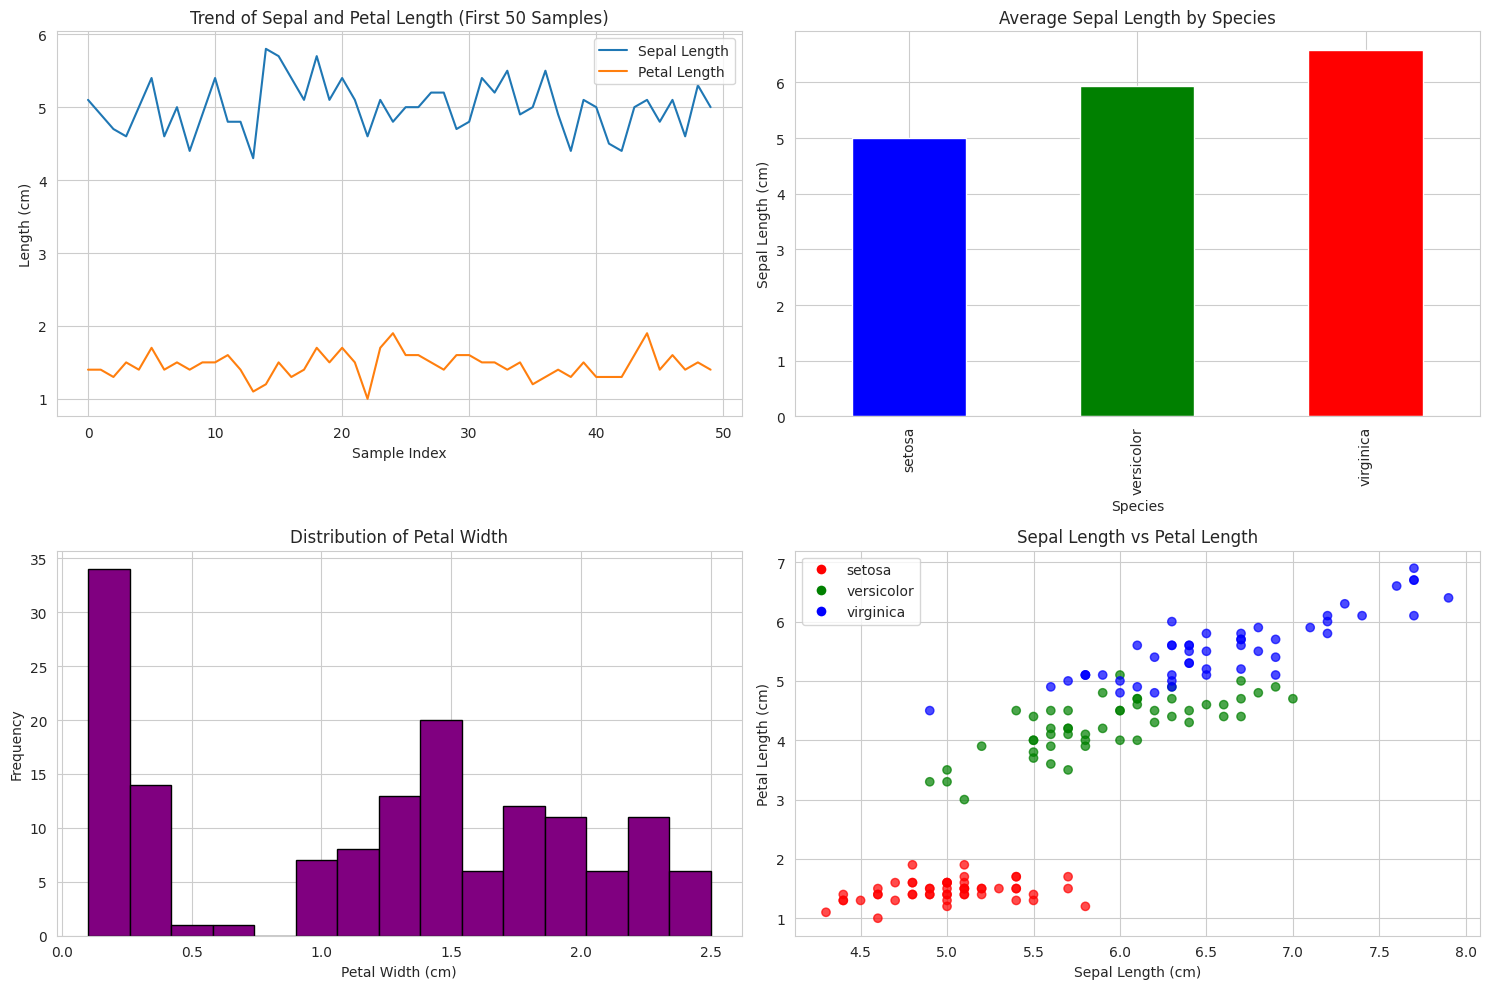

In [13]:
# Create a figure with multiple plots
plt.figure(figsize=(15, 10))

# 1. Line chart (simulating trends over time - though time isn't in this dataset)
# We'll use the index as a proxy for "time"
plt.subplot(2, 2, 1)
plt.plot(iris_df.index[:50], iris_df['sepal length (cm)'][:50], label='Sepal Length')
plt.plot(iris_df.index[:50], iris_df['petal length (cm)'][:50], label='Petal Length')
plt.title('Trend of Sepal and Petal Length (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Length (cm)')
plt.legend()

# 2. Bar chart showing comparison across categories
plt.subplot(2, 2, 2)
iris_df.groupby('species')['sepal length (cm)'].mean().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

# 3. Histogram of a numerical column
plt.subplot(2, 2, 3)
plt.hist(iris_df['petal width (cm)'], bins=15, color='purple', edgecolor='black')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# 4. Scatter plot of two numerical columns
plt.subplot(2, 2, 4)
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'],
            c=iris_df['species'].map(colors), alpha=0.7)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
# Create legend for scatter plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8)
            for k, v in colors.items()]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

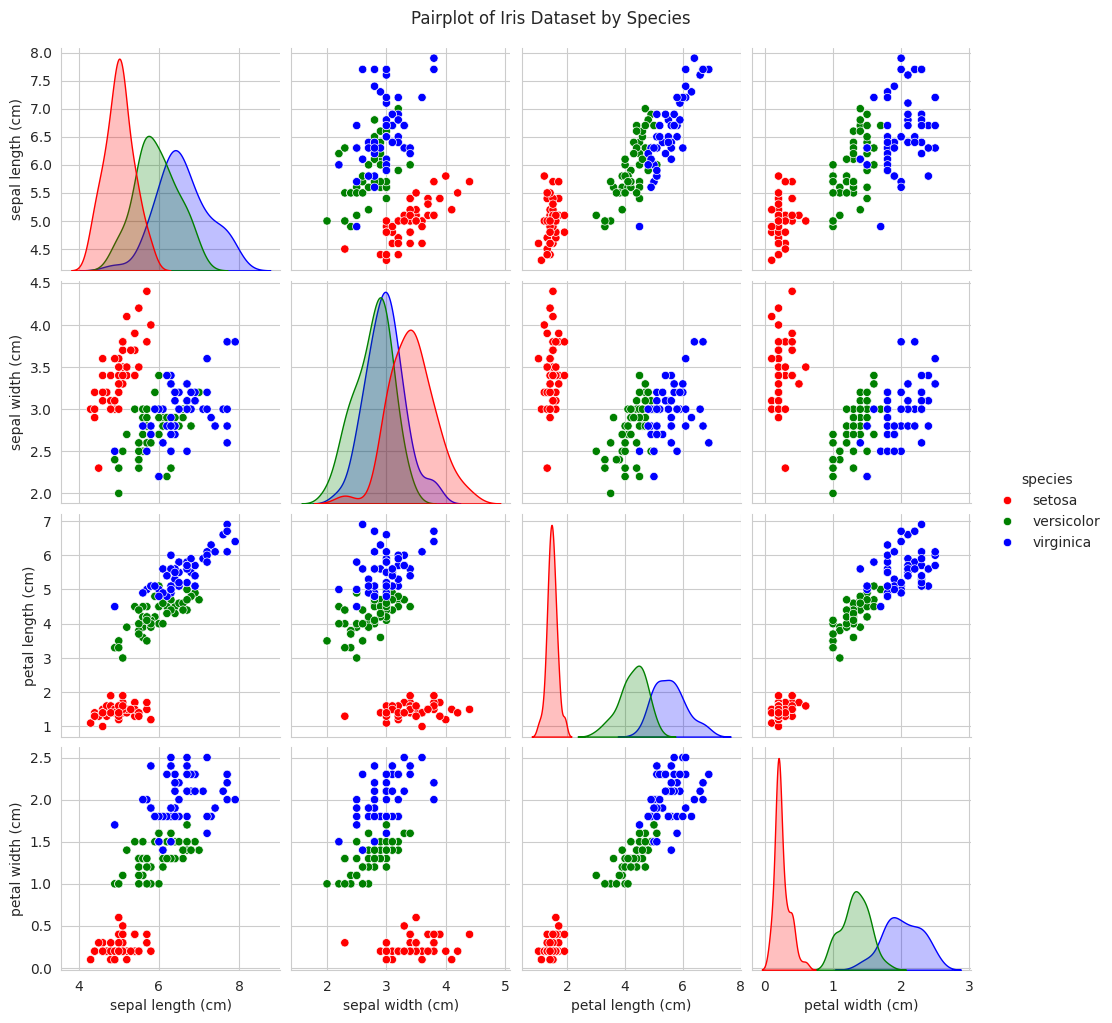

<ipython-input-14-82800cd4336c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=iris_df, palette=colors)
<ipython-input-14-82800cd4336c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=iris_df, palette=colors)


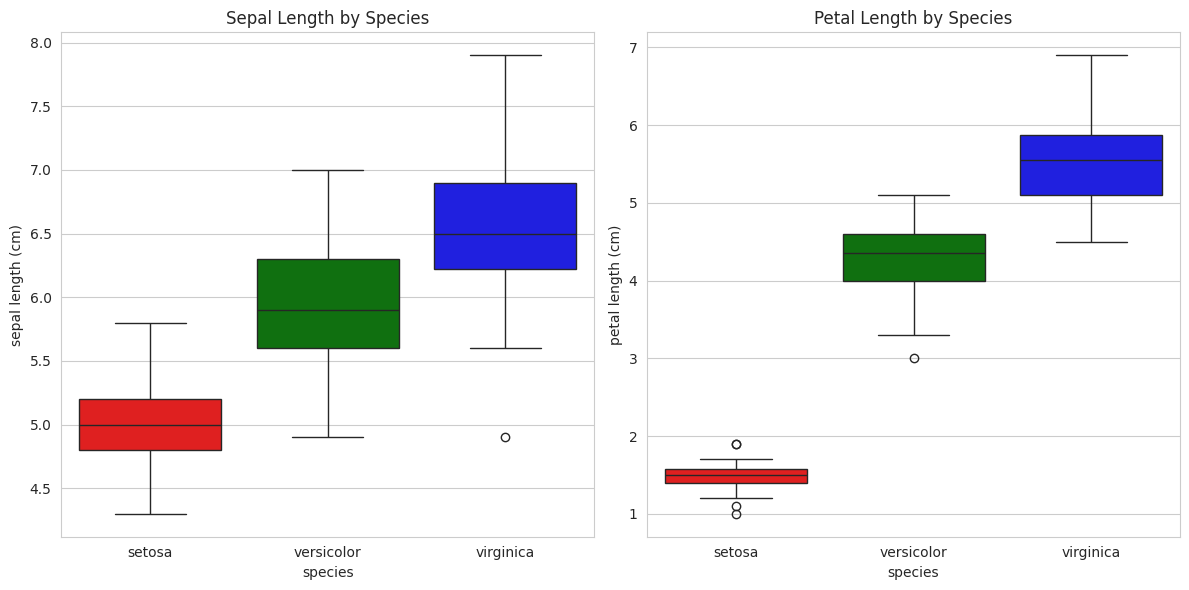

In [14]:
# Pairplot to show relationships between all numerical variables
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species', palette=colors)
plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02)
plt.show()

# Boxplot to show distribution of features by species
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df, palette=colors)
plt.title('Sepal Length by Species')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df, palette=colors)
plt.title('Petal Length by Species')

plt.tight_layout()
plt.show()